In [234]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%pylab inline

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
PID = test_data['PassengerId']

Populating the interactive namespace from numpy and matplotlib


In [235]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [236]:
cols = ['Ticket', 'Name', 'Cabin', 'PassengerId']
train_data.drop(cols,axis = 1, inplace = True)
test_data.drop(cols,axis = 1, inplace = True)

In [237]:
print('Null values in Train Data\n' ,train_data.isnull().sum())
print('\nNull values in Test Data\n' ,test_data.isnull().sum())

Null values in Train Data
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Null values in Test Data
 Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [238]:
from sklearn.preprocessing import OneHotEncoder
train_data['Embarked'].fillna(train_data['Embarked'].mode(), inplace = True)

cols = ['Sex', 'Embarked']
for i in cols:
    train_data = pd.concat([train_data, pd.get_dummies(train_data[i],i,drop_first=True)], axis = 1)
    train_data.drop(i,axis = 1, inplace = True)

    test_data = pd.concat([test_data, pd.get_dummies(test_data[i],i,drop_first=True)], axis = 1)
    test_data.drop(i,axis = 1, inplace = True)


In [239]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


<Axes: xlabel='Age', ylabel='Count'>

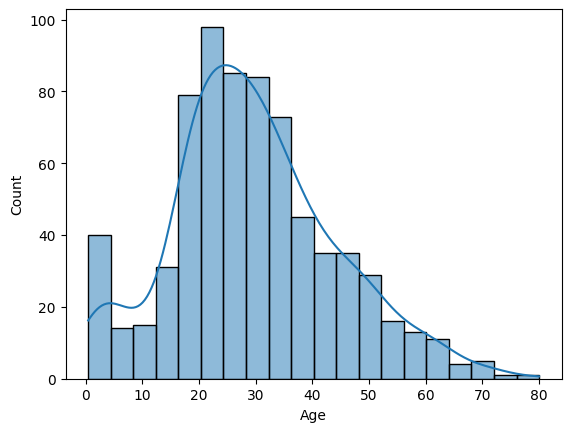

In [240]:
sns.histplot(train_data['Age'],kde = True)

<Axes: >

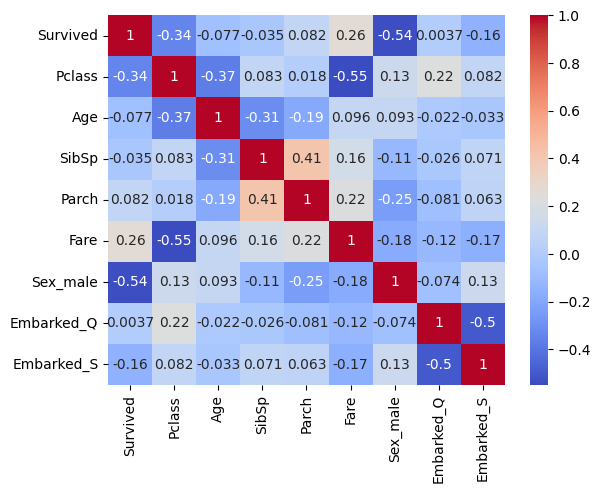

In [241]:
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

In [242]:
X = train_data.drop('Survived', axis = 1)
Y = pd.DataFrame(train_data['Survived'])
train_data, val_data, train_labels, val_labels = train_test_split(X, Y, test_size=.3)

In [243]:
print('Null values in Train Data\n' ,train_data.isnull().sum())
print('\nNull values in Validation Data\n' ,val_data.isnull().sum())
print('\nNull values in Test Data\n' ,test_data.isnull().sum())
# train_data.isnull().sum()

Null values in Train Data
 Pclass          0
Age           121
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

Null values in Validation Data
 Pclass         0
Age           56
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

Null values in Test Data
 Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [244]:
train_data.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,623.000000,502.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,2.293740,29.112390,0.565008,0.409310,31.526343,0.630819,0.081862,0.733547
std,0.838431,14.534439,1.158720,0.849272,46.546265,0.482971,0.274375,0.442459
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,15.050000,1.000000,0.000000,1.000000
75%,3.000000,37.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [245]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
val_data['Age'].fillna(train_data['Age'].mean(), inplace = True)

test_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace = True)

In [246]:
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
val_data = sc.transform(val_data)
test_data = sc.transform(test_data)

In [320]:
from sklearn.linear_model import LogisticRegression
L = LogisticRegression(random_state = 20).fit(train_data,train_labels)
Lpred = L.predict(val_data)
accuracy_score(Lpred,val_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8022388059701493

In [321]:
Lpred = L.predict(test_data)

In [322]:
sub = {'PassengerId':PID, 'Survived':Lpred}
sub = pd.DataFrame(data = sub)
sub.to_csv('submit.csv',index=False)

In [280]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
